In [321]:
import pandas as pd

## Day 2 – Exploratory Data Analysis (EDA)

### 1. Closing Price Over Time
- The closing price shows a steady long-term upward trend.
- There are minor dips, but overall it’s approaching an all-time high as of Oct 2025.
- Note: This doesn’t account for inflation or stock splits.

### 2. Trading Volume
- Volume peaked around mid-2020 and has declined steadily since.
- This could mean reduced short-term volatility and fewer trading surges.

### 3. Correlation Analysis
- `Open`, `High`, `Low`, and `Close` are highly correlated (~ 0.99).
- `Volume` has a weak positive correlation (~ 0.5) with price-related features.
- `Target` shows near-zero correlation with all — indicating no linear relationship.
- This reinforces that prediction will likely require **non-linear models**.

### 4. Rolling Standard Deviation (Volatility)
- The rolling standard deviation is mostly flat at longer windows.
- Shorter rolling windows (e.g. 20 days) may show better localized volatility patterns.

### 5. Overall Insights
- The market appears generally stable with mild fluctuations.
- Simple correlations can’t explain next-day movement.
- Future steps should include:
  - Engineering non-linear features.
  - Adding indicators like moving averages, RSI, or momentum.


In [322]:
df = pd.read_csv("../data/clean_stock_data.csv")
df.rename(columns={"Price": "Date"}, inplace=True)

In [323]:
df.head()

,Date,Close,High,Low,Open,Volume,Target
0,2015-01-02,24.261047,24.729270,23.821672,24.718174,212818400,0
1,2015-01-05,23.577574,24.110150,23.391173,24.030263,257142000,1
2,2015-01-06,23.579800,23.839430,23.218091,23.641933,263188400,1
3,2015-01-07,23.910429,24.010286,23.677426,23.788380,160423600,1
4,2015-01-08,24.829130,24.886826,24.121248,24.238859,237458000,1


In [324]:
df["Date"] = pd.to_datetime(df["Date"], errors="coerce")

In [325]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2710 entries, 0 to 2709
Data columns (total 7 columns):
 #   Column  Non-Null Count  Dtype         
---  ------  --------------  -----         
 0   Date    2710 non-null   datetime64[ns]
 1   Close   2710 non-null   float64       
 2   High    2710 non-null   float64       
 3   Low     2710 non-null   float64       
 4   Open    2710 non-null   float64       
 5   Volume  2710 non-null   int64         
 6   Target  2710 non-null   int64         
dtypes: datetime64[ns](1), float64(4), int64(2)
memory usage: 148.3 KB


In [326]:
import matplotlib.pyplot as plt

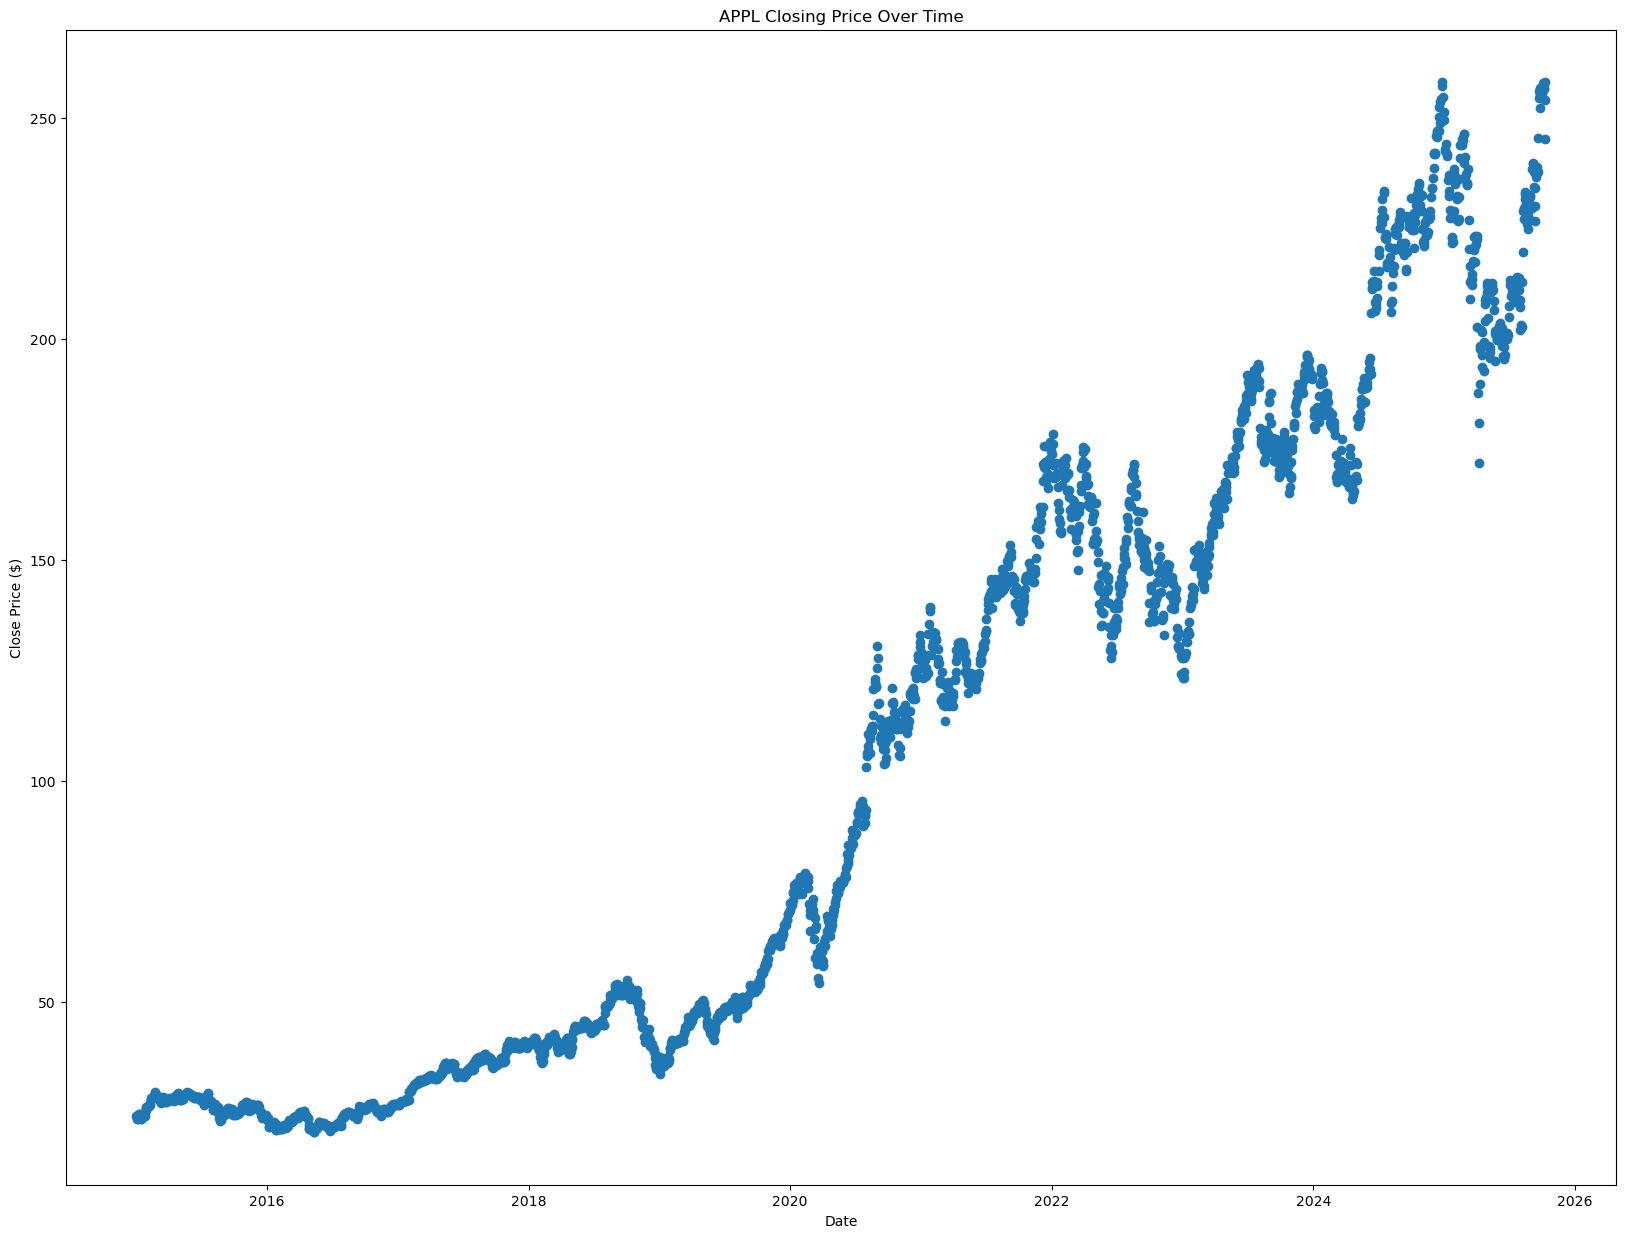

In [327]:
plt.figure(figsize=(20,15))
plt.scatter(df.Date,df.Close)
plt.title("APPL Closing Price Over Time")
plt.xlabel("Date")
plt.ylabel("Close Price ($)")
plt.show()

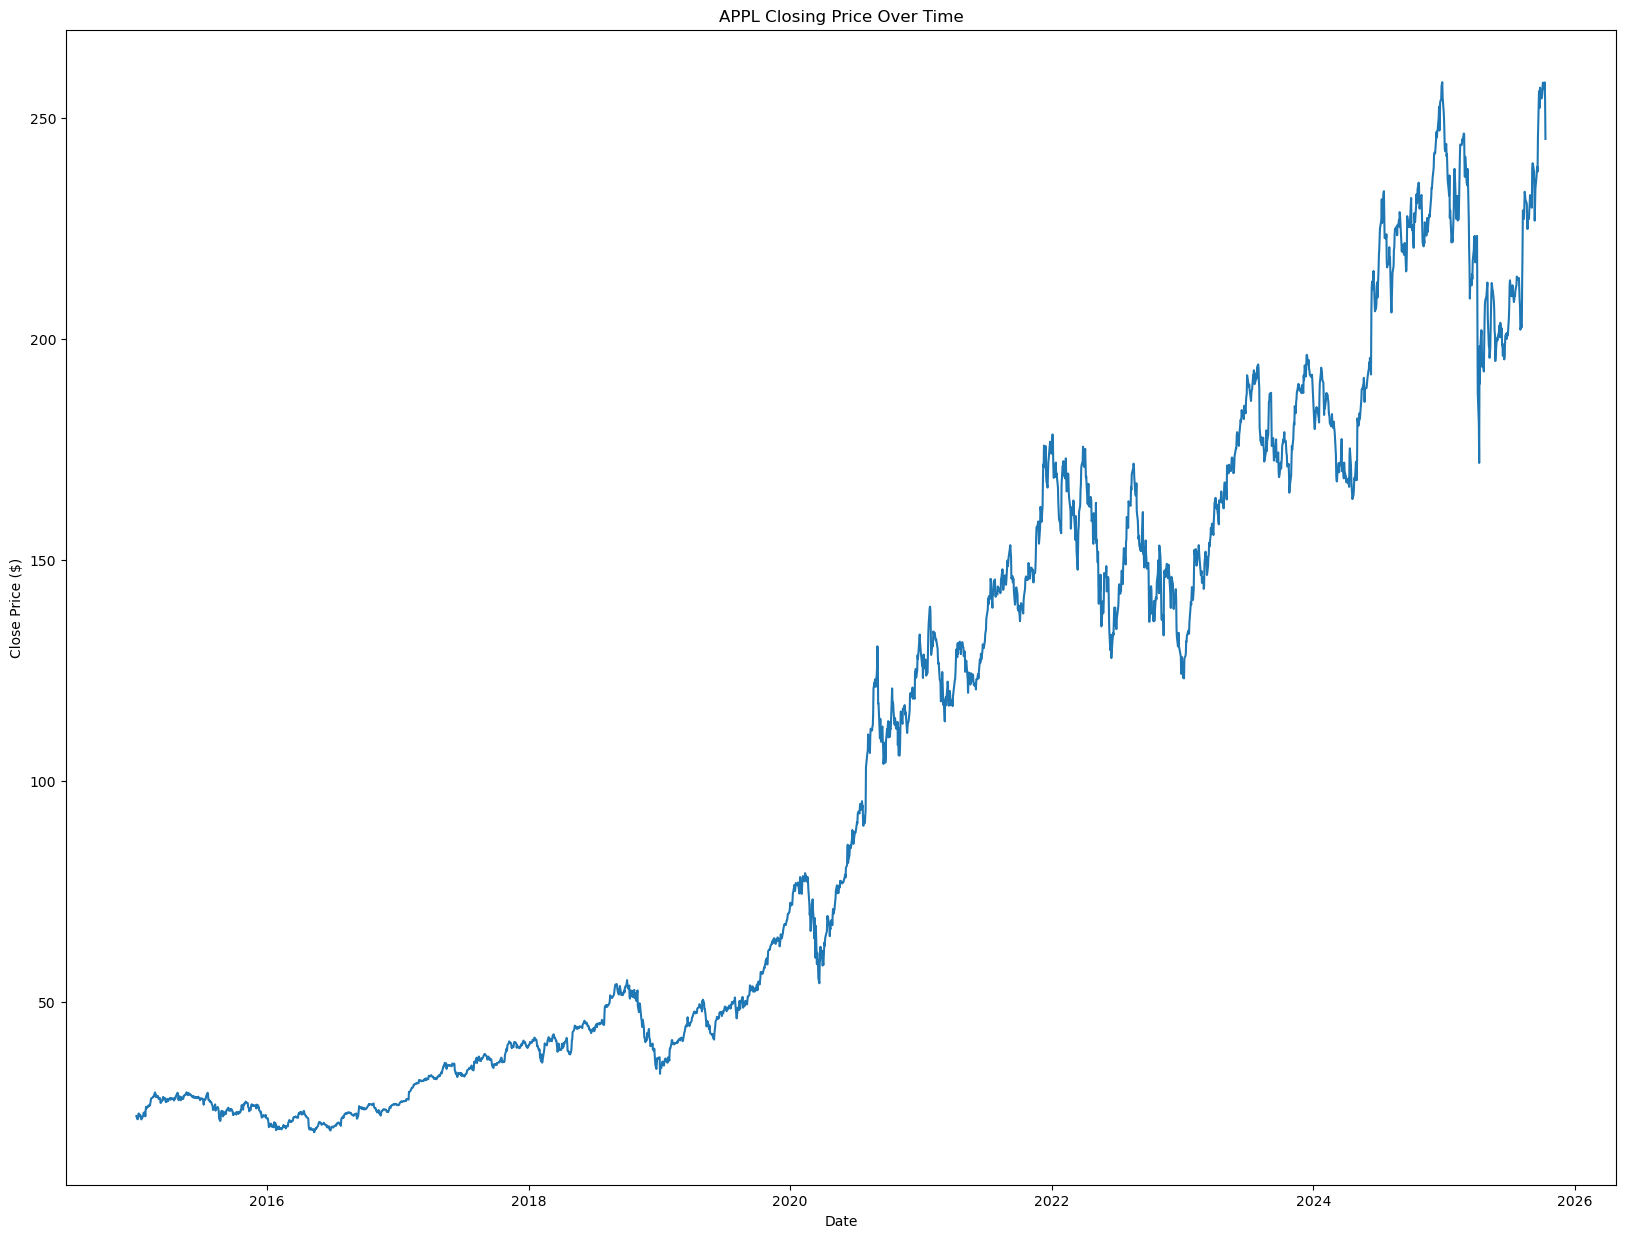

In [328]:
plt.figure(figsize=(20,15))
plt.plot(df.Date,df.Close)
plt.title("APPL Closing Price Over Time")
plt.xlabel("Date")
plt.ylabel("Close Price ($)")
plt.show()

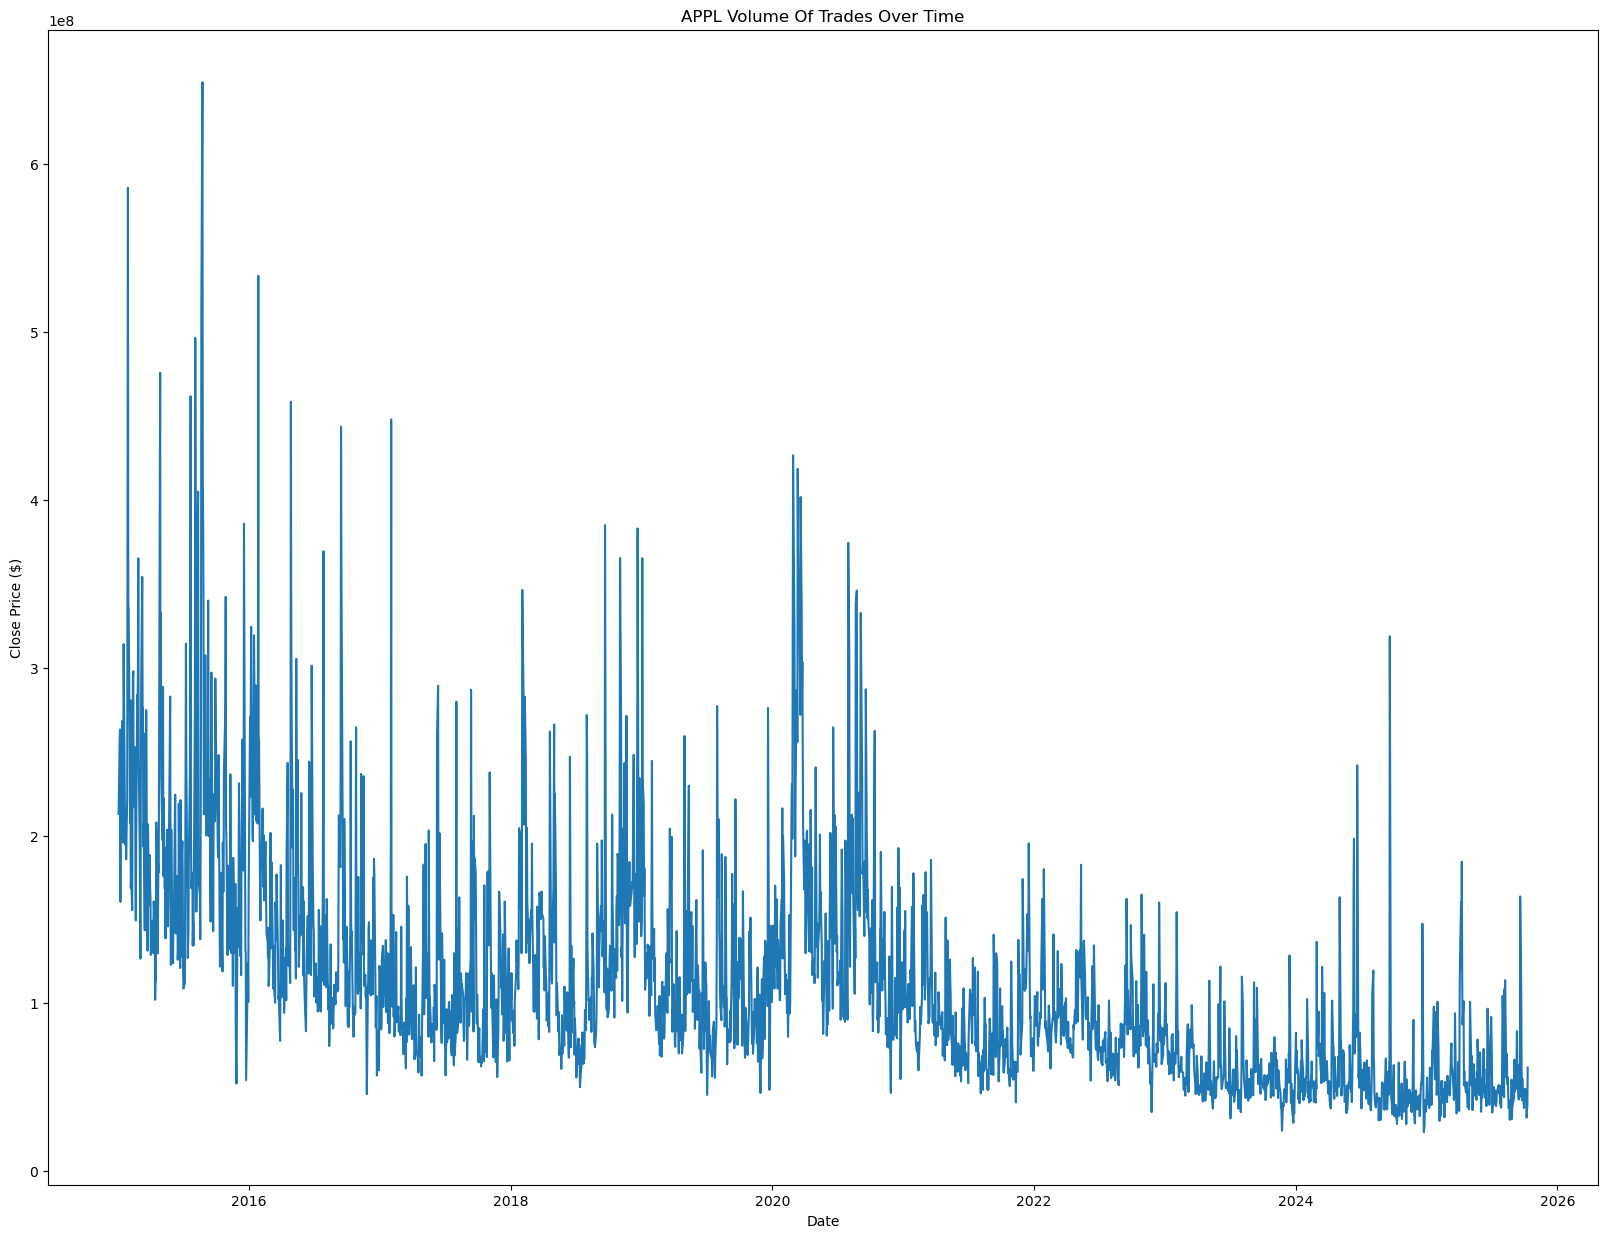

In [329]:
plt.figure(figsize=(20,15))
plt.plot(df.Date,df.Volume)
plt.title("APPL Volume Of Trades Over Time")
plt.xlabel("Date")
plt.ylabel("Close Price ($)")
plt.show()

In [330]:
df_2020 = df[(df["Date"] >= "2020-01-01") & (df.Date <= "2020-12-31")]
df_2021 = df[(df["Date"] >= "2021-01-01") & (df.Date <= "2021-12-31")]
df_2022 = df[(df["Date"] >= "2022-01-01") & (df.Date <= "2022-12-31")]
df_2025 = df[df["Date"] >= "2025-01-01"]

In [331]:
df_2020.head()

,Date,Close,High,Low,Open,Volume,Target
1258,2020-01-02,72.538521,72.598899,71.292311,71.545897,135480400,0
1259,2020-01-03,71.833282,72.594048,71.608677,71.765659,146322800,1
1260,2020-01-06,72.405685,72.444328,70.703020,70.954195,118387200,0
1261,2020-01-07,72.065140,72.671333,71.845362,72.415330,108872000,1
1262,2020-01-08,73.224403,73.526295,71.768079,71.768079,132079200,1


In [332]:
df_2020.tail()

,Date,Close,High,Low,Open,Volume,Target
1506,2020-12-24,128.591003,130.042858,127.743284,127.957652,54930100,1
1507,2020-12-28,133.190186,133.823537,130.091599,130.559319,124486200,0
1508,2020-12-29,131.416794,135.236425,130.900365,134.515381,121047300,0
1509,2020-12-30,130.296234,132.508117,129.984420,132.108611,96452100,0
1510,2020-12-31,129.292572,131.290086,128.347407,130.646981,99116600,0


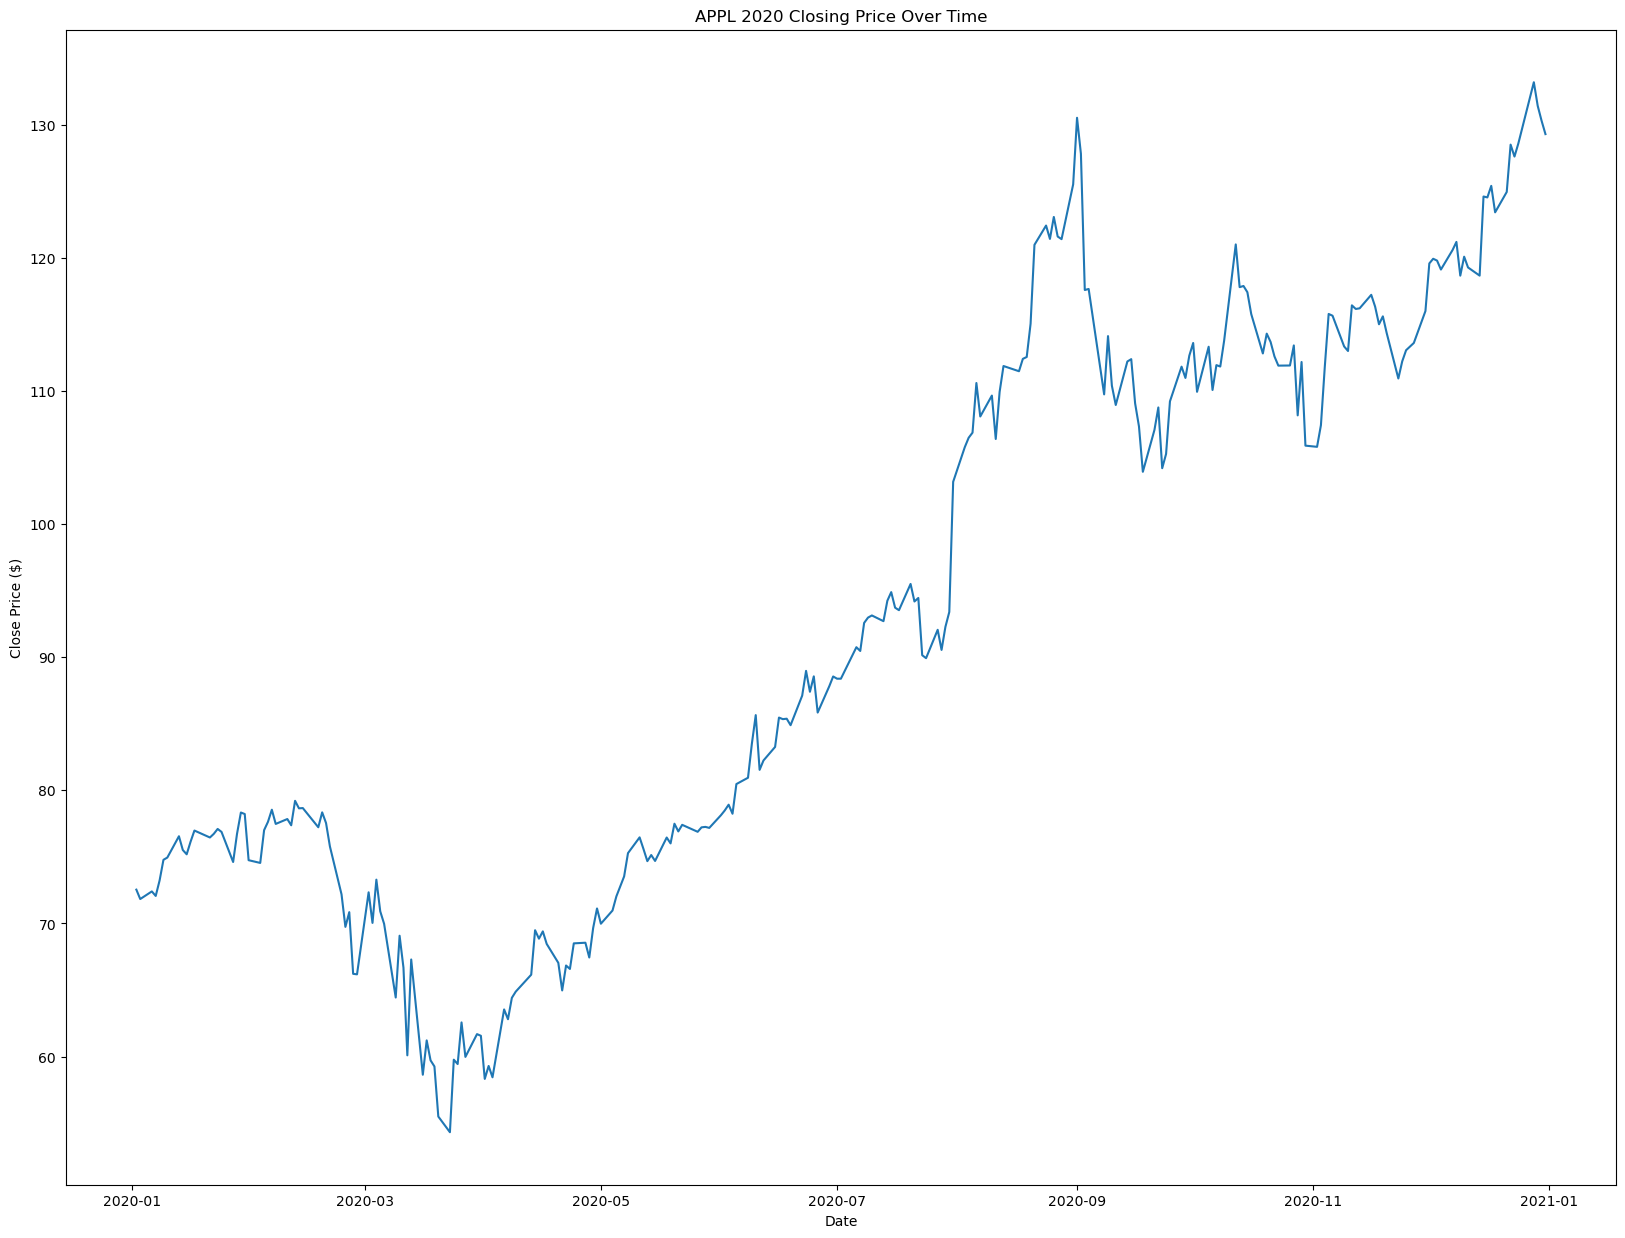

In [333]:
plt.figure(figsize=(20,15))
plt.plot(df_2020.Date,df_2020.Close)
plt.title("APPL 2020 Closing Price Over Time")
plt.xlabel("Date")
plt.ylabel("Close Price ($)")
plt.show()

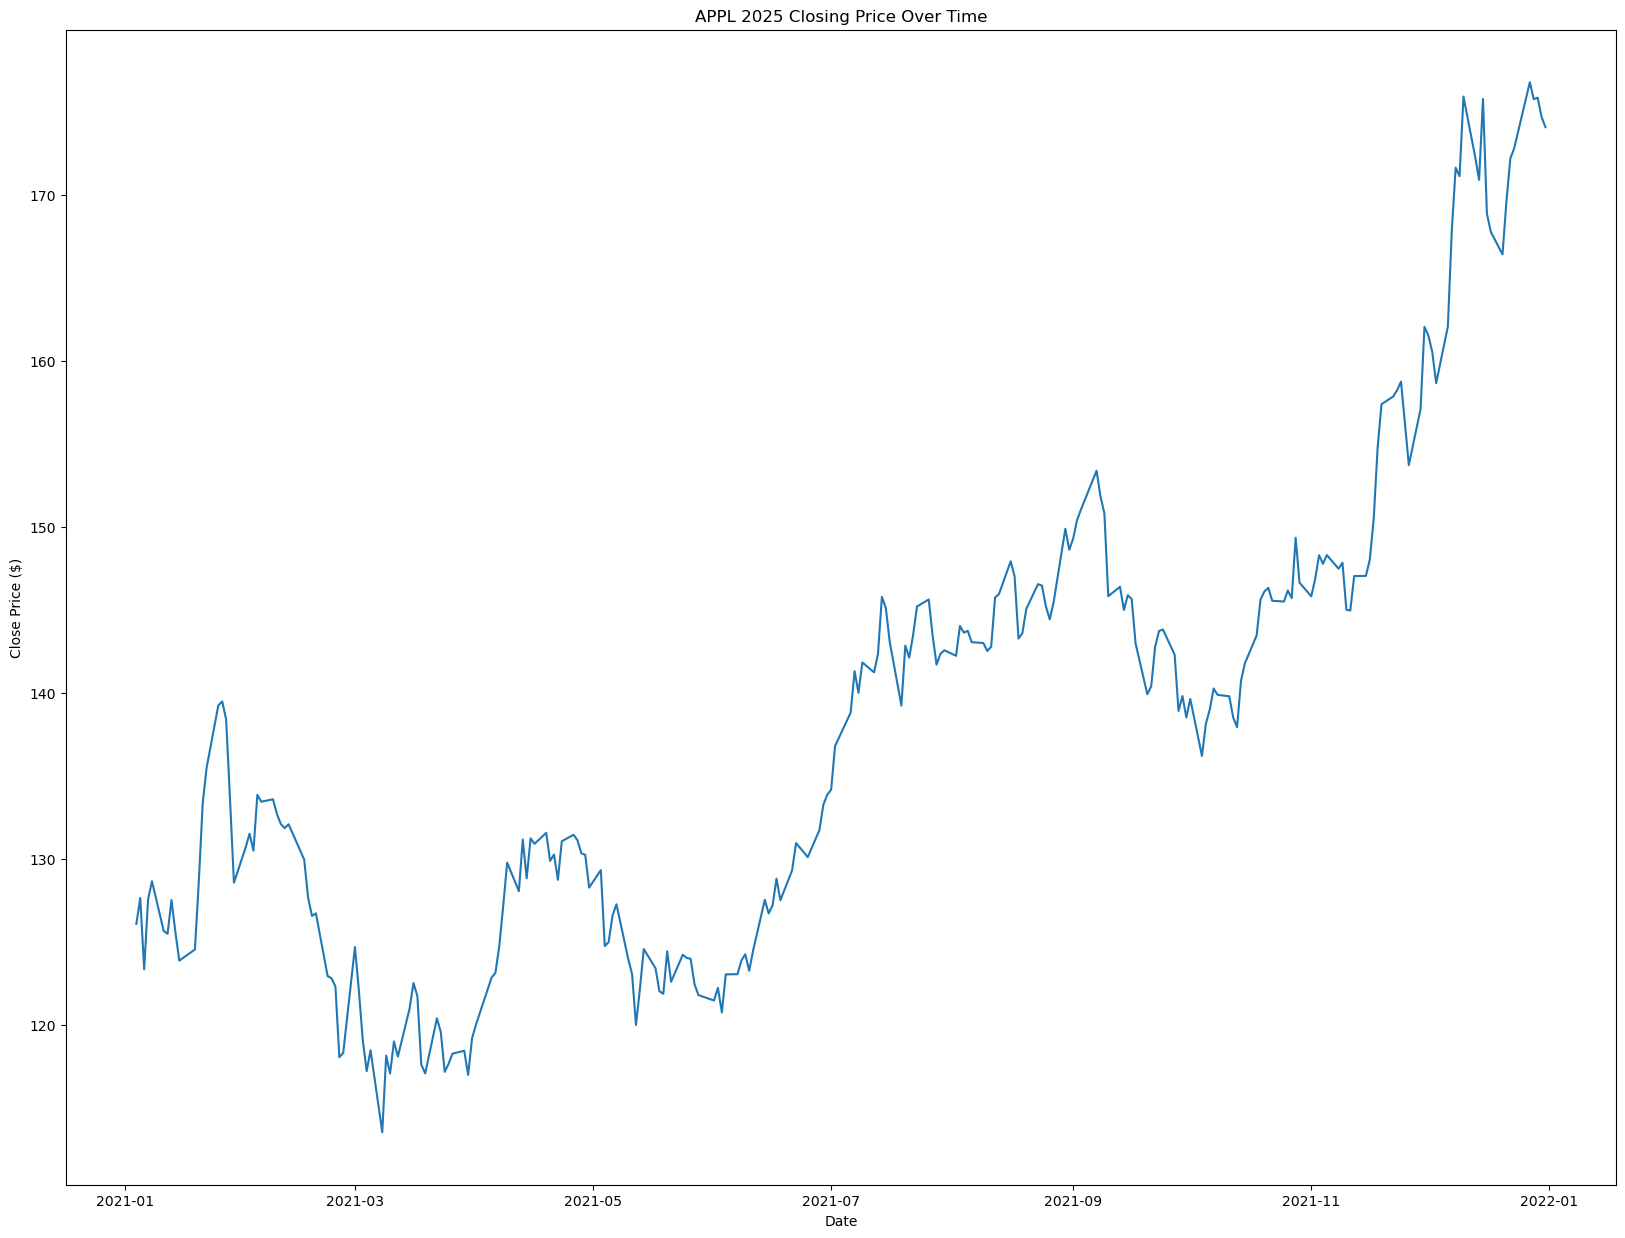

In [334]:
plt.figure(figsize=(20,15))
plt.plot(df_2021.Date,df_2021.Close)
plt.title("APPL 2025 Closing Price Over Time")
plt.xlabel("Date")
plt.ylabel("Close Price ($)")
plt.show()

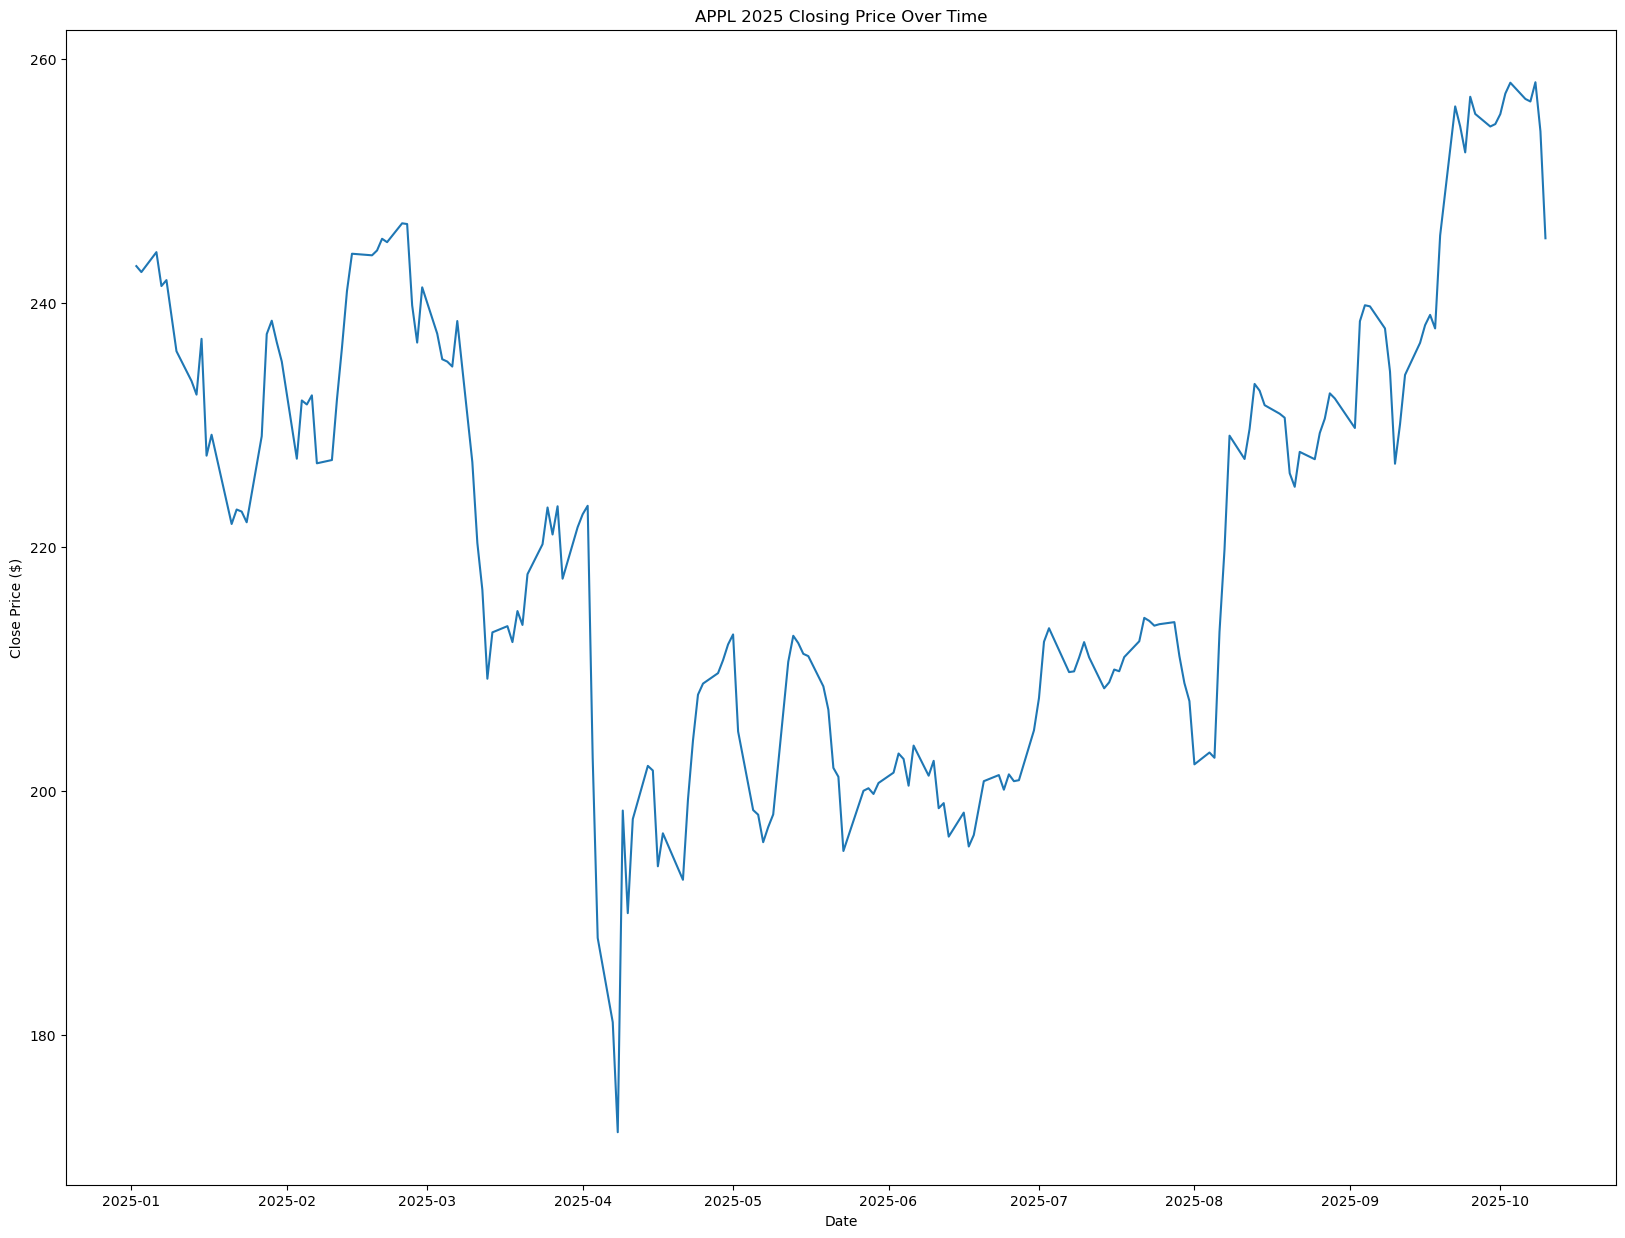

In [335]:
plt.figure(figsize=(20,15))
plt.plot(df_2025.Date,df_2025.Close)
plt.title("APPL 2025 Closing Price Over Time")
plt.xlabel("Date")
plt.ylabel("Close Price ($)")
plt.show()

In [336]:
df['Close'].pct_change()

0            NaN
1      -0.028172
2       0.000094
3       0.014022
4       0.038423
          ...   
2705   -0.005155
2706   -0.000818
2707    0.006160
2708   -0.015578
2709   -0.034522
Name: Close, Length: 2710, dtype: float64

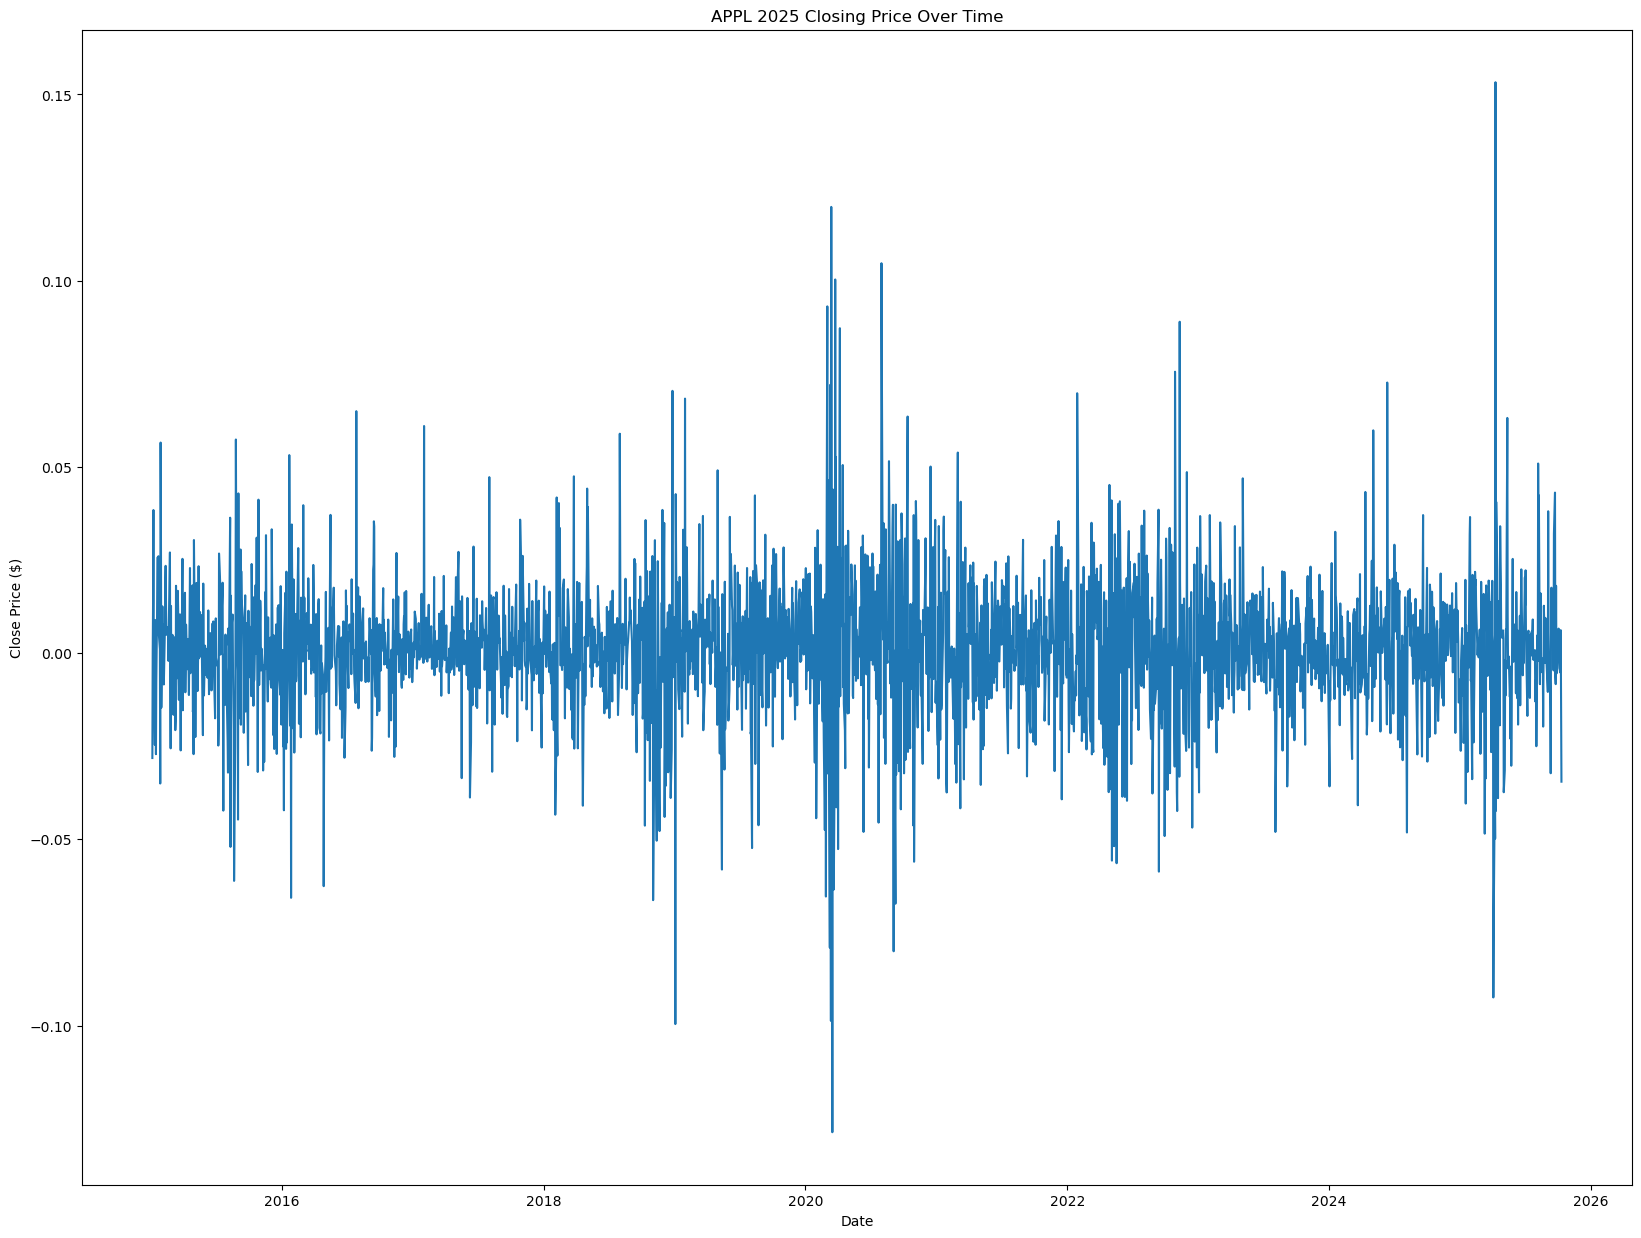

In [337]:
plt.figure(figsize=(20,15))
plt.plot(df.Date,df.Close.pct_change())
plt.title("APPL 2025 Closing Price Over Time")
plt.xlabel("Date")
plt.ylabel("Close Price ($)")
plt.show()

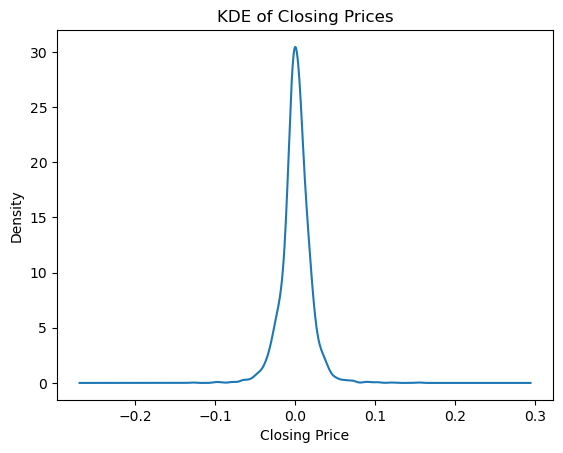

In [338]:
df['Close'].pct_change().plot(kind='kde', title='KDE of Closing Prices')
plt.xlabel('Closing Price')
plt.show()


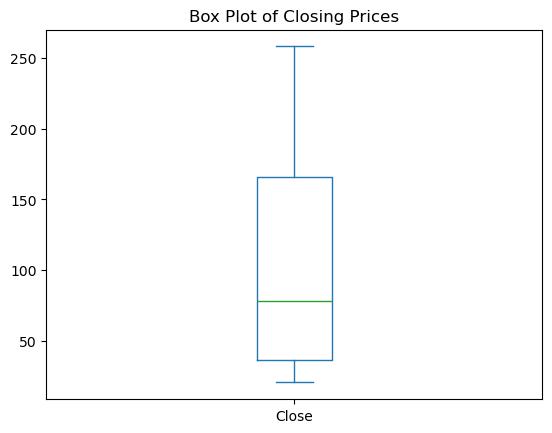

In [339]:
df[['Close']].plot(kind='box', title='Box Plot of Closing Prices')
plt.show()


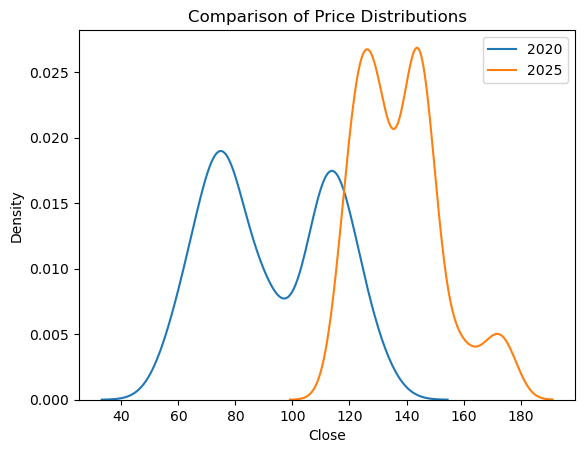

In [340]:
import seaborn as sns
sns.kdeplot(df_2020['Close'], label='2020')
sns.kdeplot(df_2021['Close'], label='2025')
plt.legend()
plt.title('Comparison of Price Distributions')
plt.show()


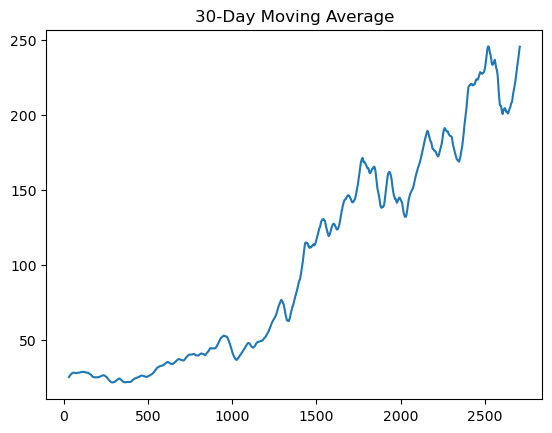

In [341]:
df['Close'].rolling(window=30).mean().plot(title='30-Day Moving Average')
plt.show()

In [342]:
(df.Target == 1).sum()

1437

In [343]:
(df.Target == 0).sum()

1273

In [344]:
df.Target.sum()

1437

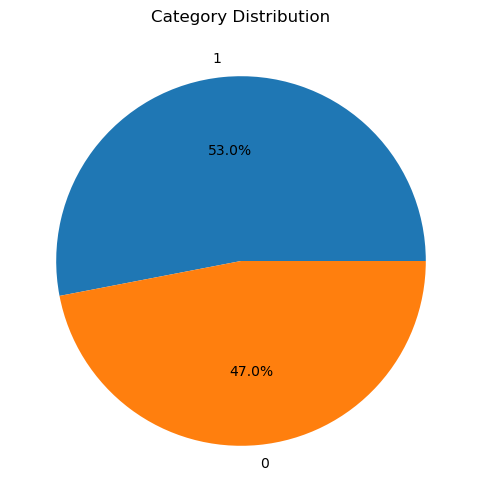

In [345]:
df['Target'].value_counts().plot(kind='pie', autopct='%1.1f%%', figsize=(6, 6))
plt.title('Category Distribution')
plt.ylabel('')  # remove default y-label
plt.show()

In [346]:
df.corr()

,Date,Close,High,Low,Open,Volume,Target
Date,1.000000,0.957546,0.957852,0.957299,0.957418,-0.597134,0.010910
Close,0.957546,1.000000,0.999848,0.999843,0.999668,-0.563777,-0.004122
High,0.957852,0.999848,1.000000,0.999778,0.999833,-0.560418,-0.004036
Low,0.957299,0.999843,0.999778,1.000000,0.999848,-0.566890,-0.003786
Open,0.957418,0.999668,0.999833,0.999848,1.000000,-0.563570,-0.004116
Volume,-0.597134,-0.563777,-0.560418,-0.566890,-0.563570,1.000000,-0.009945
Target,0.010910,-0.004122,-0.004036,-0.003786,-0.004116,-0.009945,1.000000


In [347]:
df.head()

,Date,Close,High,Low,Open,Volume,Target
0,2015-01-02,24.261047,24.729270,23.821672,24.718174,212818400,0
1,2015-01-05,23.577574,24.110150,23.391173,24.030263,257142000,1
2,2015-01-06,23.579800,23.839430,23.218091,23.641933,263188400,1
3,2015-01-07,23.910429,24.010286,23.677426,23.788380,160423600,1
4,2015-01-08,24.829130,24.886826,24.121248,24.238859,237458000,1


In [348]:
corr = df.corr(numeric_only=True)
corr

,Close,High,Low,Open,Volume,Target
Close,1.000000,0.999848,0.999843,0.999668,-0.563777,-0.004122
High,0.999848,1.000000,0.999778,0.999833,-0.560418,-0.004036
Low,0.999843,0.999778,1.000000,0.999848,-0.566890,-0.003786
Open,0.999668,0.999833,0.999848,1.000000,-0.563570,-0.004116
Volume,-0.563777,-0.560418,-0.566890,-0.563570,1.000000,-0.009945
Target,-0.004122,-0.004036,-0.003786,-0.004116,-0.009945,1.000000


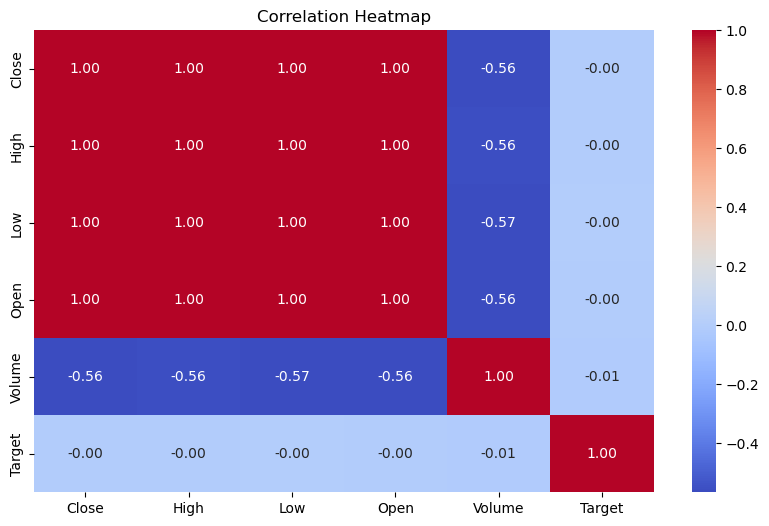

In [349]:
plt.figure(figsize=(10, 6))
sns.heatmap(corr, annot=True, cmap='coolwarm', fmt=".2f")
plt.title("Correlation Heatmap")
plt.show()

In [350]:
df['Rolling_STD_20'] = df['Close'].rolling(window=20, min_periods=1).std()
df.head()

,Date,Close,High,Low,Open,Volume,Target,Rolling_STD_20
0,2015-01-02,24.261047,24.729270,23.821672,24.718174,212818400,0,NaN
1,2015-01-05,23.577574,24.110150,23.391173,24.030263,257142000,1,0.483289
2,2015-01-06,23.579800,23.839430,23.218091,23.641933,263188400,1,0.393963
3,2015-01-07,23.910429,24.010286,23.677426,23.788380,160423600,1,0.325868
4,2015-01-08,24.829130,24.886826,24.121248,24.238859,237458000,1,0.527647


In [351]:
df_2020['Rolling_STD_20'] = df['Close'].rolling(window=20, min_periods=1).std()
df.head()

C:\Users\dalu\AppData\Local\Temp\ipykernel_12900\3732990959.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_2020['Rolling_STD_20'] = df['Close'].rolling(window=20, min_periods=1).std()


,Date,Close,High,Low,Open,Volume,Target,Rolling_STD_20
0,2015-01-02,24.261047,24.729270,23.821672,24.718174,212818400,0,NaN
1,2015-01-05,23.577574,24.110150,23.391173,24.030263,257142000,1,0.483289
2,2015-01-06,23.579800,23.839430,23.218091,23.641933,263188400,1,0.393963
3,2015-01-07,23.910429,24.010286,23.677426,23.788380,160423600,1,0.325868
4,2015-01-08,24.829130,24.886826,24.121248,24.238859,237458000,1,0.527647


In [352]:
# df_2020[['Close', 'Rolling_STD_30']].plot(figsize=(10,6))
# plt.title('30-Day Rolling Standard Deviation of Close Price')
# plt.xlabel('Date')
# plt.ylabel('Price / Volatility')
# plt.show()

In [353]:
df.to_csv("../data/explored_stock_data.csv")